# **Deskripsi Library yang Digunakan**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Memanggil Dataset**

In [2]:
df = pd.read_csv('data_mobil_bekas.csv')

# **Deskripsi Dataset**

In [6]:
# melihat beberapa detail dari dataset
# df.head() berfungsi untuk menampilkan 5 baris pertama dari dataset sehingga bisa melihat kolom apa saja
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,17995,Manual,16444,Petrol,265,36.2,2.0
4,GT86,2014,12998,Manual,25499,Petrol,260,36.2,2.0


In [7]:
# melihat tipe data dari dataset
# pada case regresi linier ini kita hanya akan menggunakan atribut tipe data angka saja
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         490 non-null    object 
 1   year          490 non-null    int64  
 2   price         490 non-null    int64  
 3   transmission  490 non-null    object 
 4   mileage       490 non-null    int64  
 5   fuelType      490 non-null    object 
 6   tax           490 non-null    int64  
 7   mpg           490 non-null    float64
 8   engineSize    490 non-null    float64
dtypes: float64(2), int64(4), object(3)
memory usage: 34.6+ KB


<Axes: >

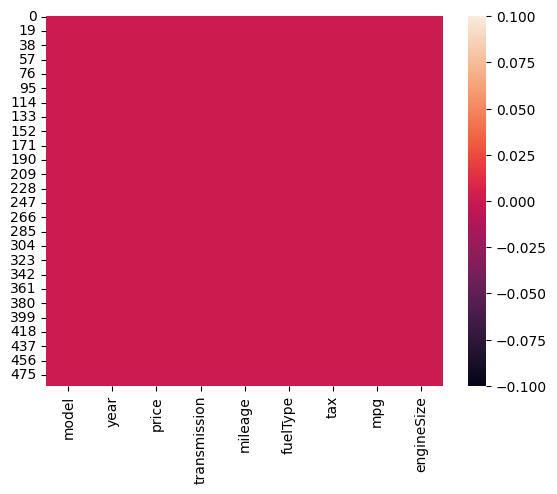

In [8]:
# berfungsi untuk melihat apakah ada missing value, pada data ini tidak ada pembagian sehingga tidak ada missing value
sns.heatmap(df.isnull())

In [9]:
# berfungsi melihat nilai rata-rata dari dataset
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000
mean,2017.014286,12025.973469,19756.414286,106.520408,60.880000,1.309796
std,2.105063,8648.242975,17110.851144,76.467140,12.520931,0.540871
min,2005.000000,2495.000000,5.000000,0.000000,2.800000,1.000000
25%,2016.000000,7250.000000,7046.500000,0.000000,56.500000,1.000000
50%,2017.000000,8890.000000,15845.500000,145.000000,67.000000,1.000000
75%,2019.000000,13370.750000,27352.000000,145.000000,69.000000,1.500000
max,2020.000000,59995.000000,120000.000000,330.000000,134.500000,3.000000


# **Visualisasi Data**

<ipython-input-10-97cdbf7f1862>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

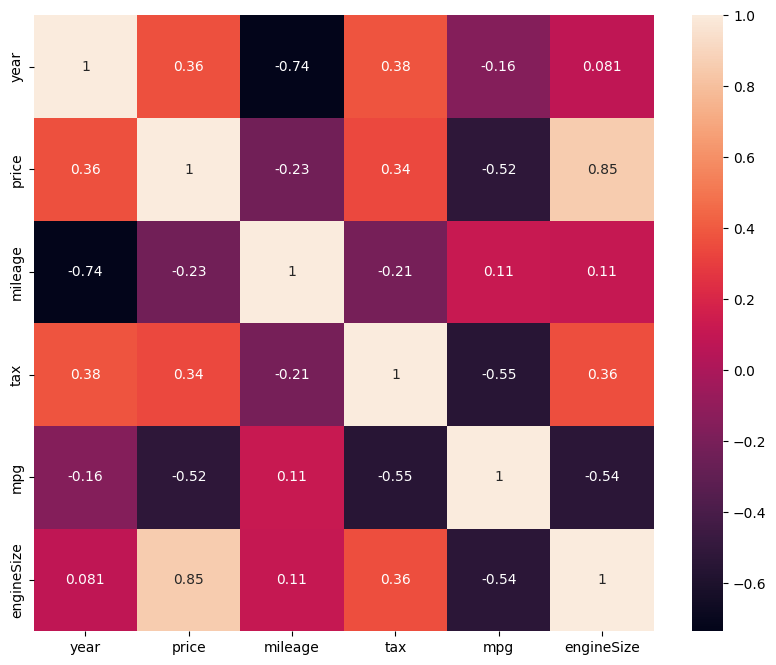

In [10]:
# akan menampilkan data yang menggunakan numerik
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

# **Jumlah Mobil Berdasarkan Model**

In [11]:
models=df.groupby('model').count()[['tax']].sort_values(by='tax',ascending=True).reset_index()
models= models.rename(columns={'tax':'numberOfCars'})

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, ' Verso-S'),
  Text(1, 0, ' Urban Cruiser'),
  Text(2, 0, ' PROACE VERSO'),
  Text(3, 0, ' Auris'),
  Text(4, 0, ' Avensis'),
  Text(5, 0, ' Verso'),
  Text(6, 0, ' Supra'),
  Text(7, 0, ' IQ'),
  Text(8, 0, ' Corolla'),
  Text(9, 0, ' Camry'),
  Text(10, 0, ' RAV4'),
  Text(11, 0, ' GT86'),
  Text(12, 0, ' Land Cruiser'),
  Text(13, 0, ' Prius'),
  Text(14, 0, ' Hilux'),
  Text(15, 0, ' Yaris'),
  Text(16, 0, ' C-HR'),
  Text(17, 0, ' Aygo')])

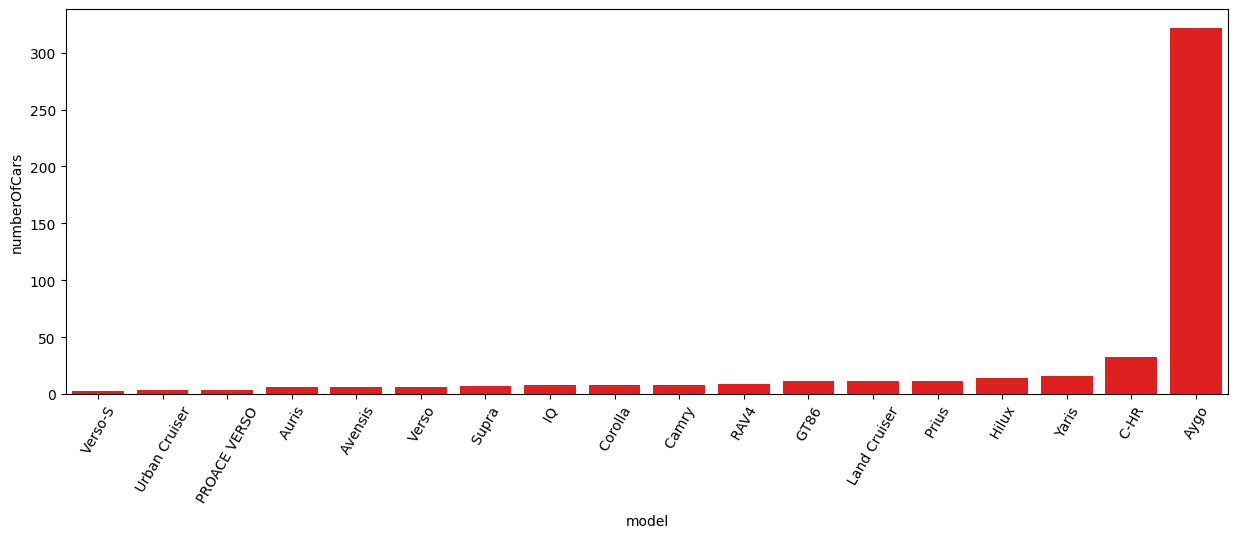

In [25]:
#tipikal grafik ini adalah barplot
fig = plt.figure(figsize=(15,5))
sns.barplot(x=models['model'],y=models['numberOfCars'], color='red')
plt.xticks(rotation=60)

# **Ukuran Mesin**

In [13]:
engine=df.groupby('engineSize').count()[['tax']].sort_values(by='tax').reset_index()
engine=engine.rename(columns={'tax':'count'})

<Axes: xlabel='engineSize', ylabel='count'>

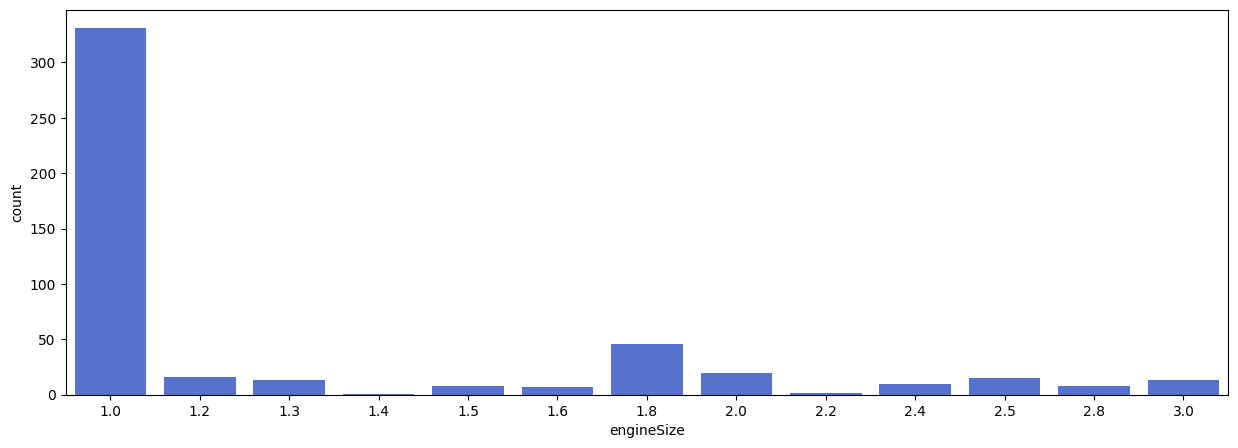

In [14]:
plt.figure(figsize=(15,5))
sns.barplot(x=engine['engineSize'],y=engine['count'],color='red')

# **Distribusi Mileage**

<ipython-input-15-8a407d5b8387>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['mileage'])


<Axes: xlabel='mileage', ylabel='Density'>

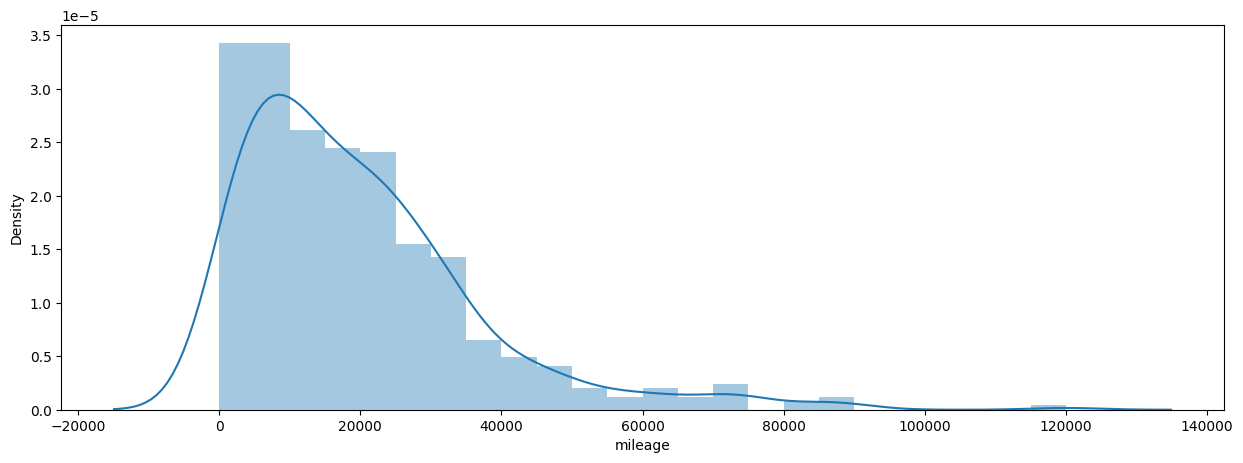

In [15]:
# karena distribusi maka kita akan pakai displot
plt.figure(figsize=(15,5))
sns.distplot(df['mileage'])

# **Distribusi Harga Mobil**

<ipython-input-16-7a32f1d4aa34>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

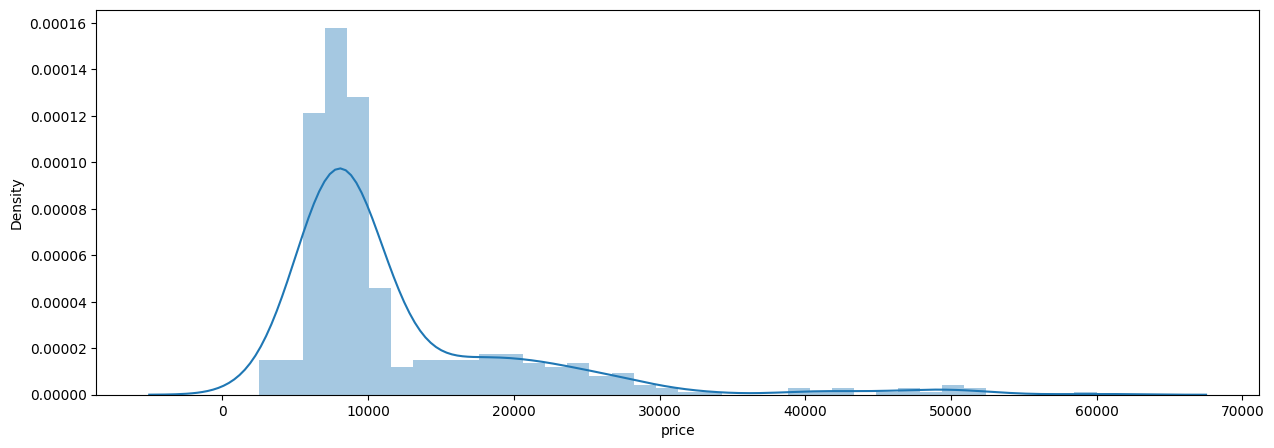

In [16]:
plt.figure(figsize=(15,5))
sns.distplot(df['price'])

# **Seleksi Fitur**

In [17]:
# features ini haus sesuai yang berada di dataset seperti nama dan kecil atau kapital hurufnya
# price akan dijadikan label atau target
# shape berfungsi untuk menampilkan jumlah datanya ada berapa
features=['year','mileage','tax','mpg','engineSize']
x = df[features]
y = df['price']
x.shape, y.shape

((490, 5), (490,))

# **Split Data Training & Data Testing**

In [26]:
#import library sklearn
from sklearn.model_selection import train_test_split
# train untuk training dan test untuk testing
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=70)
y_test.shape
# dari data 490 maka kita ambil 123 data sebagai data testing

(123,)

# **Membuat Model Regresi Linier**

In [19]:
from sklearn.linear_model import LinearRegression
# definisikan linearregression dalam lr
lr = LinearRegression()
# fit menerima input jadinya untuk melatih model menggunakan data yang sudah di parameter yaitu x dan y train
lr.fit(x_train,y_train)
# prediksi x_test
pred = lr.predict(x_test)

In [20]:
score = lr.score(x_test, y_test)
print('Akurasi Model Regresi Linier = ', score)

Akurasi Model Regresi Linier =  0.8798691984499877


# **Membuat Inputan Model Regresi Linier**

In [27]:
#Year=2016, mileage=24089, tax=265, mpg=36.2, engineSize=2
input_data = np.array([[2016,24089,265,36.2,2]])

#memprediksi dari variabel inpput_data
prediction= lr.predict(input_data)
print('Prediksi Harga Mobil :', prediction)

Prediksi Harga Mobil : [19136.26594672]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# **Save Model**

In [28]:
# kita akan simpan ke pickle untuk nanti akan digunakan ke dalam streamlit
import pickle

# create nama model
filename = 'estimasi_harga_mobil.sav'
pickle.dump(lr,open(filename,'wb'))
# yang akan di dump adalah model lr, dan kita panggil open dari file name, wb = write binary